# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


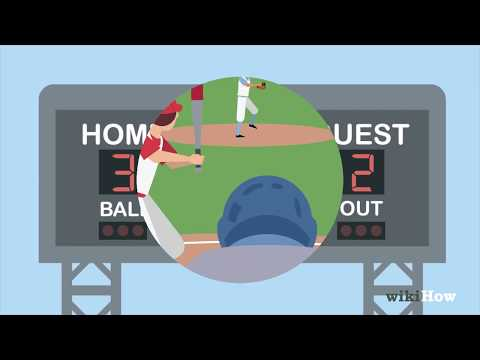

In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

### In all the plots we are using colorblind-friendly colors from the [this](https://davidmathlogic.com/colorblind/#%23FFC20A-%230C7BDC) website

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [3]:
contrib = 'data/baseballdatabank-2023/contrib/'
core = 'data/baseballdatabank-2023/core/'
#load the salaries data
salaries = pd.read_csv(contrib + "Salaries.csv")
#load the people datafrmame
people_df = pd.read_csv(core + "People.csv")
#load the pitching data
pitching = pd.read_csv(core + "Pitching.csv")

#make a deep copy of the salaries dataframe
salaries_cop = salaries.copy()
#filtering the salaries dataframe to take only years before 2010 (2010 included)
salaries_bef_2010 = salaries_cop[salaries_cop["yearID"] <= 2010]

#make a deep copy of the pitching dataframe
pitching_cop = pitching.copy()
#filtering the pitching dataframe to take only years before 2010 (2010 included)
pitching_bef_2010 = pitching_cop[pitching_cop["yearID"] <= 2010]

#removing duplicates from the salaries dataframe based on the plyerID and yearID
salaries_bef_2010_without_dupli = salaries_bef_2010.drop_duplicates(
    subset=['yearID', 'playerID'])  # keep='first' by default

#printing the size of the salaries and pitching dataframes before and after filtering
print("The size of the Salaries dataframe before the filter: ", salaries.size,
      "ie:", salaries.shape)
print(
    "The size of the Salaries dataframe taking only years before 2010 and removing duplicates is:",
    salaries_bef_2010_without_dupli.size, "ie:",
    salaries_bef_2010_without_dupli.shape)

print("The size of the Ptiching dataframe before the filter: ", pitching.size,
      "ie:", pitching.shape)
print("The size of the Pitching dataframe taking only years before 2010 is :",
      pitching_bef_2010.size, "ie:", pitching_bef_2010.shape)

The size of the Salaries dataframe before the filter:  132140 ie: (26428, 5)
The size of the Salaries dataframe taking only years before 2010 and removing duplicates is: 106755 ie: (21351, 5)
The size of the Ptiching dataframe before the filter:  1512060 ie: (50402, 30)
The size of the Pitching dataframe taking only years before 2010 is : 1212990 ie: (40433, 30)


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [4]:
#checking and printing what are the values in the throws column
print(people_df['throws'].unique())

['R' 'L' nan 'S']


In [5]:
#make a deep copy of the people dataframe
people_cop = people_df.copy()

#filtering the people dataframe to take only the players who throw with their left or right hand
people_LR = people_cop[people_cop["throws"].isin(['L', 'R'])]

**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [6]:
#get the intersecting column to merge on
print(
    np.intersect1d(pitching_bef_2010.columns.values, people_LR.columns.values))

['playerID']


In [7]:
#merging the People and Pitching dataframes
pitching_people = pd.merge(pitching_bef_2010,
                           people_LR,
                           on=['playerID'],
                           how='left')

**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

Percentage of data missing in 1892 is:4.55%


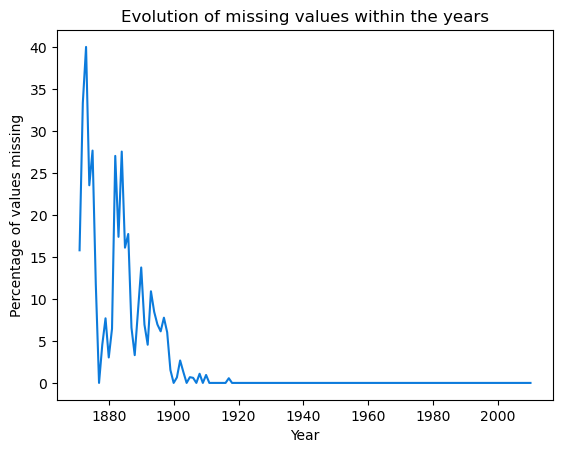

In [8]:
#grouping the data by yearID counting the total and missing number of values in the column throws
year_count = pitching_people.groupby(
    'yearID', as_index=False)[['playerID', 'throws']].agg({
        'playerID':
        'count',
        'throws':
        lambda p: p.isna().sum()
    })
#rename the columns
year_count.columns = ['yearID', 'total_count', 'nan_count']
year_count[
    'na_perc'] = 100 * year_count['nan_count'] / year_count['total_count']

#Calculating the percentage of NA values in 1892 and printing it
perc1892 = year_count[year_count['yearID'] == 1892]['na_perc'].values[0]
print('Percentage of data missing in 1892 is:{0:.2f}%'.format(perc1892))

#plotting the evolution of the percentage of NA values within the years
plt.plot(year_count['yearID'], year_count['na_perc'], color='#0C7BDC')
plt.xlabel('Year')
plt.ylabel('Percentage of values missing')
plt.title('Evolution of missing values within the years')

#Show the plot
plt.show()

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [9]:
#making a deep copy of the pitching_people dataframe
pitching_people_cop = pitching_people.copy()
#filtering the pitching_people dataframe to take only the years after 1920
pitching_people_aft_1920 = pitching_people_cop[pitching_people_cop["yearID"] >=
                                               1920]

#making a deep copy then filtering the salary dataframe to take only the years after 1920
salaries_copy = salaries_bef_2010_without_dupli.copy()
salaries_aft_1920 = salaries_copy[salaries_copy["yearID"] >= 1920]

**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [10]:
#get the intersecting column to merge on
print(
    np.intersect1d(pitching_people_aft_1920.columns.values,
                   salaries_aft_1920.columns.values))

['lgID' 'playerID' 'teamID' 'yearID']


In [11]:
#merging the pitching_people and salaries dataframes on playerID, yearID, teamID and lgID
#using left join to put priority on the pitching_people dataframe
pitching_people_salaries = pd.merge(
    pitching_people_aft_1920,
    salaries_aft_1920,
    on=['playerID', 'yearID', 'teamID', 'lgID'],
    how='left')

#Displaying the merged dataframe
display(pitching_people_salaries)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01,NaN
1,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01,NaN
2,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01,NaN
3,altener01,1920,1,DET,AL,0,1,14,1,0,...,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01,NaN
4,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


Percentage of data missing in 2002 is:41.88%


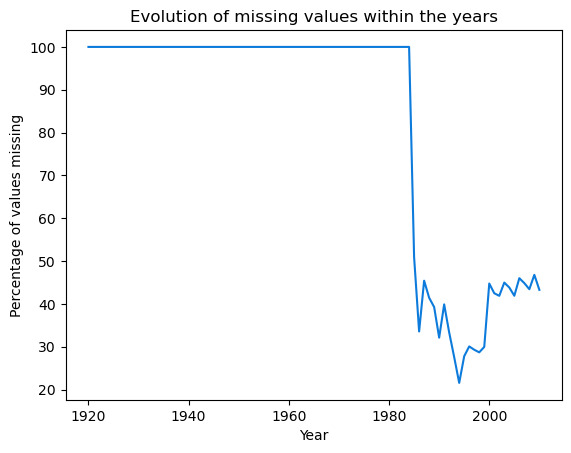

In [12]:
#grouping the data by yearID counting the total and missing number of values in the column salary
year_count_na = pitching_people_salaries.groupby(
    'yearID', as_index=False)[['playerID', 'salary']].agg({
        'playerID':
        'count',
        'salary':
        lambda p: p.isna().sum()
    })
#rename the columns
year_count_na.columns = ['yearID', 'total_count', 'nan_count']
year_count_na['na_perc'] = 100 * year_count_na['nan_count'] / year_count_na[
    'total_count']

#Calculating the percentage of NA values in 1892 and printing it
perc2002 = year_count_na[year_count_na['yearID'] == 2002]['na_perc'].values[0]
print('Percentage of data missing in 2002 is:{0:.2f}%'.format(perc2002))

#plotting the evolution of the percentage of NA values within the years
plt.plot(year_count_na['yearID'], year_count_na['na_perc'], color='#0C7BDC')
plt.xlabel('Year')
plt.ylabel('Percentage of values missing')
plt.title('Evolution of missing values within the years')

#Show the plot
plt.show()

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [13]:
pitching_people_salaries_ascending = pitching_people_salaries[
    pitching_people_salaries['salary'].notna()].sort_values(by=['yearID'],
                                                            ascending=True)
print(pitching_people_salaries_ascending.iloc[0]['yearID'])

1985


In [14]:
#taking the first year and last year for which there is salary data by sorting the dataframe by yearID
pitching_people_salaries_ascending = pitching_people_salaries[
    pitching_people_salaries['salary'].notna()].sort_values(by=['yearID'],
                                                            ascending=True)
first_year = pitching_people_salaries_ascending.iloc[0]['yearID']
last_year = pitching_people_salaries_ascending.iloc[-1]['yearID']

#printing the values
print("The first year for which there exists salary data is :", first_year)
print("The last year for which there exists salary data is :", last_year)

#making a deep copy of the salaries dataframe
pitching_people_salaries_copy = pitching_people_salaries.copy()
pitching_people_salaries_filtered = pitching_people_salaries_copy.loc[
    (pitching_people_salaries_copy['yearID'] >= first_year)
    & (pitching_people_salaries_copy['yearID'] <= last_year)]
display(pitching_people_salaries_filtered)

The first year for which there exists salary data is : 1985
The last year for which there exists salary data is : 2010


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
18432,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN
18433,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,Johnny Ray,185.0,72.0,R,R,1985-09-04,1985-10-03,abrej001,abregjo01,NaN
18434,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,170000.0
18435,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,147500.0
18436,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,Richard Warren,195.0,76.0,R,R,1985-06-12,2000-09-06,aguir001,aguilri01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [15]:
# PROVIDED CODE

df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

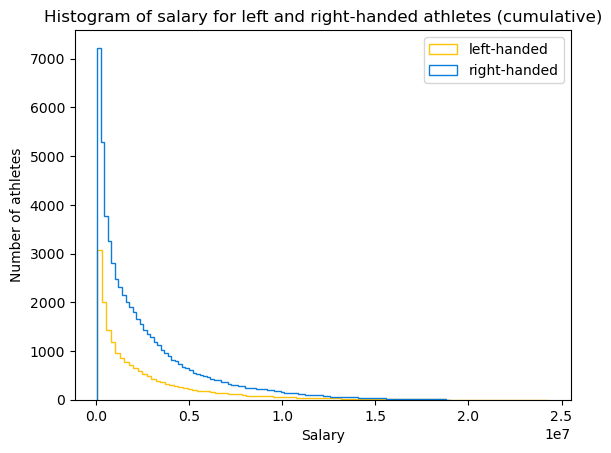

In [16]:
#Get the salaries for left-handed pitchers
df_l = df[df["throws"] == "L"]["salary"]
#Get the salaries for right-handed pitchers
df_r = df[df["throws"] == "R"]["salary"]
#Plot the CCDF for both salaries in linear scale
arr_l_cum = plt.hist(df_l.dropna(),
                     bins=100,
                     cumulative=-1,
                     histtype='step',
                     color='#FFC20A')
arr_r_cum = plt.hist(df_r.dropna(),
                     bins=100,
                     cumulative=-1,
                     histtype='step',
                     color='#0C7BDC')
plt.title(
    'Histogram of salary for left and right-handed athletes (cumulative)')
plt.ylabel('Number of athletes')
plt.xlabel('Salary')
plt.legend(['left-handed', 'right-handed'])

#Show the plot
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

This plot is too condensed which limits the amount of information one can draw from it. The solution would be to plot the x axis in log scale to get the figure below.

**2.3 —** Implement the solution proposed by yourself in the previous question.

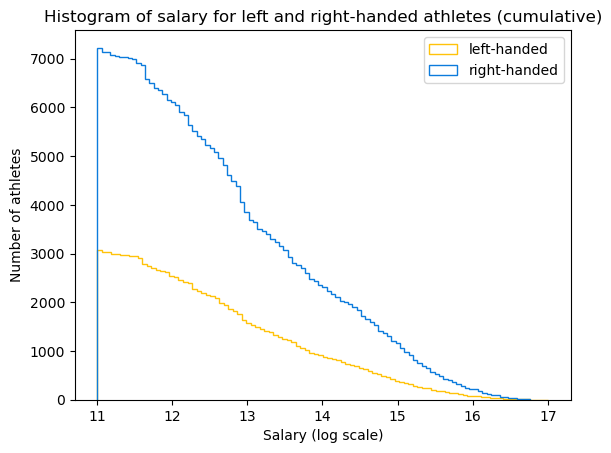

In [17]:
# Write your code here
#Plot the CCDF for both salaries in log scale for x and in linear scale for y
plt.hist(np.log(df_l.dropna().values),
         bins=100,
         cumulative=-1,
         histtype='step',
         color='#FFC20A')
plt.hist(np.log(df_r.dropna().values),
         bins=100,
         cumulative=-1,
         histtype='step',
         color='#0C7BDC')
plt.title(
    'Histogram of salary for left and right-handed athletes (cumulative)')
plt.ylabel('Number of athletes')
plt.xlabel('Salary (log scale)')
plt.legend(['left-handed', 'right-handed'])

#Show the plot
plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

We can see that there are more right-handed players than left-handed ones (the orange curve is above the blue curve)

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

The left mean is: 1437232.861328125 and its corresponding confidence interval is: [ 1366411.6888257822 , 1508054.0338304678 ]
The right mean is: 1597010.1359545896 and its corresponding confidence interval is: [ 1549545.116020652 , 1644475.1558885272 ]


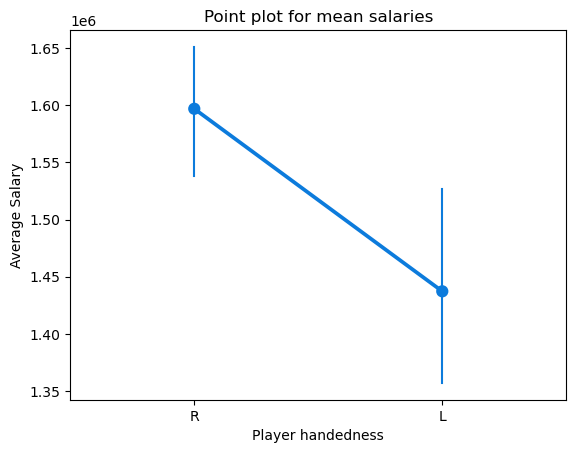

In [18]:
#Computing the 95% confidence intervals for the the salary of left-handed and right-handed pitchers using the standard error of the mean which is equal to
#the standard deviation divided by the square root of the number of salaries
mean_l = df_l.mean()
std_l = df_l.std()
mean_r = df_r.mean()
std_r = df_r.std()
conf_inter_l_lower, conf_inter_l_upper = mean_l - 1.96 * std_l / np.sqrt(
    len(df_l)), mean_l + 1.96 * std_l / np.sqrt(len(df_l))
conf_inter_r_lower, conf_inter_r_upper = mean_r - 1.96 * std_r / np.sqrt(
    len(df_r)), mean_r + 1.96 * std_r / np.sqrt(len(df_r))

print("The left mean is:", mean_l,
      "and its corresponding confidence interval is: [", conf_inter_l_lower,
      ",", conf_inter_l_upper, "]")
print("The right mean is:", mean_r,
      "and its corresponding confidence interval is: [", conf_inter_r_lower,
      ",", conf_inter_r_upper, "]")

#Drawing the point plot for the estimates
sns.pointplot(x=df["throws"],
              y=df["salary"],
              errwidth=1.5,
              errorbar=('ci', 95),
              color='#0C7BDC')
plt.title('Point plot for mean salaries')
plt.ylabel('Average Salary')
plt.xlabel('Player handedness')

#Show the plot
plt.show()

**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

Yes, it is as there is a significant difference between the 2 means given that the confidence intervals of the 2 distributions (the error bars) don't overlap.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

**First method - manual**

We can also perform the t-test manually by computing the theoretical t-value and empirical t-value and compre the two.\
The empirical t-value is obtained using the following formula:
$$ T_e = \frac{M_1 - M_2}{\sqrt{\frac{var_1}{n_1} + \frac{var_2}{n_2}}} $$
Where:
- $M_1$ and $M_2$ are the means of the first and second dataset respectively (for us the mean salaries of left and right handed pitchers)
- $var_1$ and $var_2$ the variance of these same datasets
- $n_1$ and $n_2$ are the sizes of these datasets

In [19]:
# calculate the mean for each group
right_mean = df_r.mean()
left_mean = df_l.mean()

# droping the NaN values from each group
right_salary = df_r.dropna()
left_salary = df_l.dropna()

# computing variances
right_variance = right_salary.var()
left_variance = left_salary.var()

# computing the empirical t-value
t_empirical = (right_mean -
               left_mean) / np.sqrt(right_variance / right_salary.size +
                                    left_variance / left_salary.size)

# computing the degrees of freedom
dof = (((left_variance**2 / left_salary.size) +
        (right_variance**2 / right_salary.size))**2) / ((left_variance**2) / (
            (left_salary.size**2) *
            (left_salary.size - 1))) + ((right_variance**2) /
                                        ((right_salary.size**2) *
                                         (right_salary.size - 1)))

print('empirical t-value: ', t_empirical)
print('degrees of freedom: ', dof)

empirical t-value:  3.061326258709398
degrees of freedom:  2.2693760395681244e+29


In [20]:
# Setting the level of significance
alpha = 0.05  # Level of significance (e.g., 0.05 for a 95% confidence interval)

# Computing the t-value for the given parameters
t_theoretical = stats.t.ppf(1 - alpha / 2, dof)

print("theoretical t-value:", t_theoretical)

theoretical t-value: 1.9599639845400538


We see that the theoretical and empirical t-value are very different from each other, thus we can reject the hypothesis that the two datasets are have similar means

**Second method**

In [21]:
#Computing a t-test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance.
print(ttest_ind(df_l, df_r, nan_policy='omit'))

TtestResult(statistic=-3.0106974397099378, pvalue=0.0026128052505378953, df=10293.0)


We see that the p-value is less than 0.05 and thus we can reject the null hypothesis (that the 2 means are equal/close). We can conclude that right-pitchers earn more than left-pitchers with significant difference.

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [22]:
#Getting all batting average opponent values (BAOpp) for left-handed pitchers. We only consider pitchers in the years during which they have played
#atleast 5 games by summing the number of games played for players who changed leagues/teams during the year.
baopp_l = df[df["throws"] == "L"].groupby(
    ["playerID", "yearID"]).filter(lambda x: x['G'].sum() >= 5)['BAOpp']
print(baopp_l.mean())

0.27195494811440146


In [23]:
#Getting all batting average opponent values (BAOpp) for right-handed pitchers. We only consider pitchers in the years during which they have played
#atleast 5 games by summing the number of games played for players who changed leagues/teams during the year.
baopp_r = df[df["throws"] == "R"].groupby(
    ["playerID", "yearID"]).filter(lambda x: x['G'].sum() >= 5)['BAOpp']
print(baopp_r.mean())

0.2694358810361369


In [24]:
#Running a t-test to compare the BAOpp means of the letf and right-handed pitchers
print(ttest_ind(baopp_l, baopp_r))

TtestResult(statistic=2.5006060404699317, pvalue=0.012410009765361212, df=13330.0)


Right handed pitchers have a lower observed BAOpp than left handed pitchers, so right handed pitchers' opponents tend to miss more. We also see that the difference is significant as the p-value is less than 0.05 which means we can reject the null hypothesis (that the 2 means are equal/close). We can conclude that right-handed pitchers are better (smaller BAOpp) then left handed pitchers.

In general we can conlude, right handed pitchers earned more salary and they were also better players compared to the left handed pitchers. But wait ...

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [25]:
#Computing a t-test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance, for year 2000.
print(
    ttest_ind(
        df[(df["throws"] == "L") & (df["yearID"] == 2000)]["salary"].dropna(),
        df[(df["throws"] == "R") & (df["yearID"] == 2000)]["salary"].dropna()))

TtestResult(statistic=-0.3682145722424321, pvalue=0.7128996415072697, df=418.0)


We see that the difference is not significant as the p-value is larger than 0.05 which means we can't reject the null hypothesis (that the 2 means are equal/close). We thus we can say right-handed pitchers received a similar salary as left handed pitchers.

In [26]:
#Getting all batting average opponent values (BAOpp) for left-handed pitchers for year 2000. We only consider pitchers in the years during which they have played
#atleast 5 games by summing the number of games played for players who changed leagues/teams during the year.
baopp_2000_l = df[(df["throws"] == "L") & (df["yearID"] == 2000)].groupby(
    "playerID").filter(lambda x: x['G'].sum() >= 5)['BAOpp']
print(baopp_2000_l.mean())

0.2818805031446541


In [27]:
#Getting all batting average opponent values (BAOpp) for right-handed pitchers for year 2000. We only consider pitchers in the years during which they have played
#atleast 5 games by summing the number of games played for players who changed leagues/teams during the year.
baopp_2000_r = df[(df["throws"] == "R") & (df["yearID"] == 2000)].groupby(
    "playerID").filter(lambda x: x['G'].sum() >= 5)['BAOpp']
print(baopp_2000_r.mean())

0.2795714285714286


In [28]:
#Running a t-test to compare the BAOpp means of the letf and right-handed pitchers for year 2000.
print(ttest_ind(baopp_2000_l, baopp_2000_r))

TtestResult(statistic=0.436481525713524, pvalue=0.6626487205494362, df=584.0)


We see that the difference is not significant as the p-value is larger than 0.05 which means we can't reject the null hypothesis (that the 2 means are equal/close). We thus we can say right-handed pitchers are as goood as left handed pitchers.

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

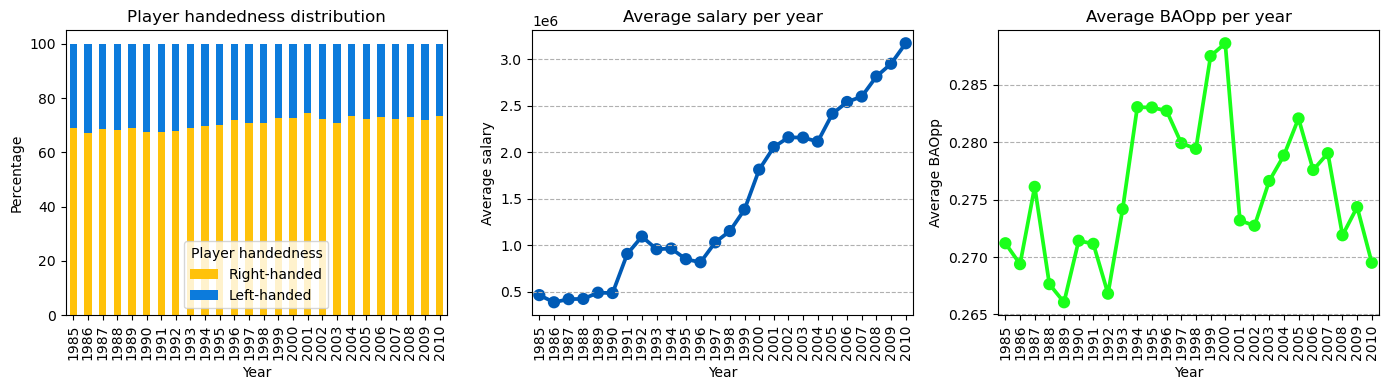

In [29]:
#Get the number of unique left-handed pitchers per year
df_year_l = df[df.throws == 'L'].groupby('yearID', as_index=False)[[
    'playerID'
]].nunique().rename({'playerID': 'left_players_count'}, axis=1)
#Get the number of unique right-handed pitchers per year
df_year_r = df[df.throws == 'R'].groupby('yearID', as_index=False)[[
    'playerID'
]].nunique().rename({'playerID': 'right_players_count'}, axis=1)
#Get the average salary and BAOpp of all pitchers per year
df_year_avg = df.groupby('yearID',
                         as_index=False)[['salary', 'BAOpp']].mean().rename(
                             {
                                 'salary': 'avg_salary',
                                 'BAOpp': 'avg_BAOpp'
                             },
                             axis=1)
#Combine all dataframes into one
df_year = pd.merge(df_year_l, df_year_r, on='yearID')
df_year = pd.merge(df_year, df_year_avg, on='yearID')
#Get the total number of pitchers per year (left + right)
df_year['all_players_count'] = df_year['right_players_count'] + df_year[
    'left_players_count']
#Get the percentage of left-handed pitchers among all pitchers per year
df_year['right_players_percent'] = 100 * df_year[
    'right_players_count'] / df_year['all_players_count']
#Get the percentage of right-handed pitchers among all pitchers per year
df_year['left_players_percent'] = 100 * df_year[
    'left_players_count'] / df_year['all_players_count']

# Set up the subplots with the figure size (14,4)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Plot 1: Stacked bar chart
df_year.set_index('yearID')[['right_players_percent', 'left_players_percent'
                             ]].plot(kind='bar',
                                     stacked=True,
                                     color=['#FFC20A', '#0C7BDC'],
                                     ax=axes[0])
axes[0].set_title('Player handedness distribution')
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('Year')
axes[0].legend(title='Player handedness',
               labels=['Right-handed', 'Left-handed'])

# Plot 2: Average Salary
sns.pointplot(x='yearID',
              y='avg_salary',
              errwidth=1.5,
              data=df_year,
              ax=axes[1],
              color='#005AB5')
axes[1].set_title('Average salary per year')
axes[1].set_ylabel('Average salary')
axes[1].set_xlabel('Year')
axes[1].grid(axis='y', linestyle='--')

# Plot 3: Average BAOpp
sns.pointplot(x='yearID',
              y='avg_BAOpp',
              data=df_year,
              ax=axes[2],
              color='#1AFF1A')
axes[2].set_title('Average BAOpp per year')
axes[2].set_ylabel('Average BAOpp')
axes[2].set_xlabel('Year')
axes[2].grid(axis='y', linestyle='--')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
#Print for the year 2007, the percentage of left-handed pitchers, the average salary, the average opponents' batting average.
df_year_2007 = df_year[df_year.yearID == 2007][[
    'left_players_percent', 'avg_salary', 'avg_BAOpp'
]]
p = df_year_2007['left_players_percent'].values[0]
s = df_year_2007['avg_salary'].values[0]
b = df_year_2007['avg_BAOpp'].values[0]
print(
    "For the year 2007, the percentage of left-handed pitchers is {p:.2f}%, the average salary is {s:.2f} and the average opponents' batting average is {b:.4f}."
    .format(p=p, s=s, b=b))

For the year 2007, the percentage of left-handed pitchers is 27.85%, the average salary is 2600513.74 and the average opponents' batting average is 0.2790.


**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

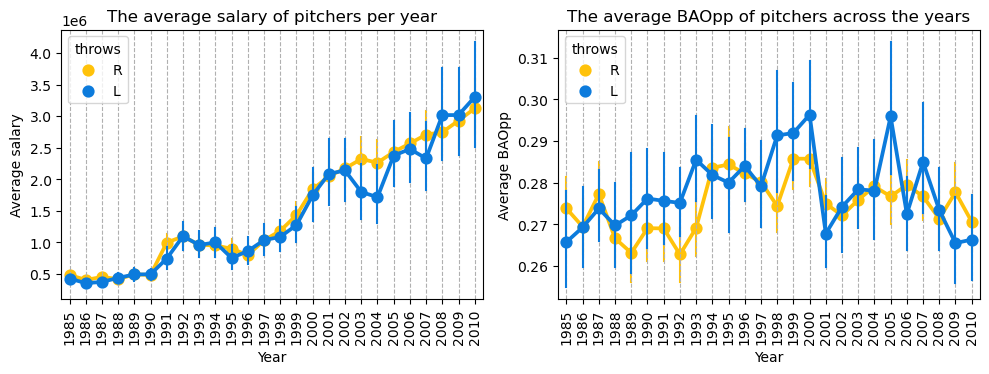

The average salary for left-handed pitchers for year 1999 is: 1.3e+06
The average BAOpp for right-handed pitchers for year 1999 is: 0.29


In [31]:
# Set up the subplots with figure size (10,4)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Plot the point plot of the average salary for left and right-handed pitchers per year
sns.pointplot(x=df.yearID,
              y=df.salary,
              hue=df.throws,
              errwidth=1.5,
              errorbar=('ci', 95),
              palette=['#FFC20A', '#0C7BDC'],
              ax=axes[0])
#Plot the point plot of the average opponents' batting average for left and right-handed pitchers per year
sns.pointplot(x=df.yearID,
              y=df.BAOpp,
              hue=df.throws,
              errwidth=1.5,
              errorbar=('ci', 95),
              palette=['#FFC20A', '#0C7BDC'],
              ax=axes[1])

# Plot 1: Average Salary
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('The average salary of pitchers per year')
axes[0].set_ylabel('Average salary')
axes[0].set_xlabel('Year')
axes[0].grid(axis='x', linestyle='--')

# Plot 2: Average BAOpp
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('The average BAOpp of pitchers across the years')
axes[1].set_ylabel('Average BAOpp')
axes[1].set_xlabel('Year')
axes[1].grid(axis='x', linestyle='--')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

print('The average salary for left-handed pitchers for year 1999 is: {0:.2}'.
      format(df[(df.yearID == 1999) & (df.throws == 'L')].salary.mean()))
print('The average BAOpp for right-handed pitchers for year 1999 is: {0:.2}'.
      format(df[(df.yearID == 1999) & (df.throws == 'R')].BAOpp.mean()))

**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**Salary**\
In 2.7, we saw that the means of the salary were not identical (right-handed people seemed to have higher salary) across all years, while it is not the case when we look at each year seperately (3.1 - 3.3) -> `Simpson Paradox`

More specifically, in 2000, from the plot we observe that the means are very close, which explains p-value > 0.05, that is we fail to reject the null hypothesis (null hypothesis being they have identical means).

It is because, up to the year of 2002 (except for 1991), we have very close means of the salary for the left and right handed people, as we can see from the plot (3.3). Then we have several years in which the average salaray of the left handed people is less then the one of right handed poeple, especially in the years of 1991, 2003, 2004 and 2007. Even if the difference is not much significant (big overlap in the ci bars), when calculating the averge salary across all years, those differences have been excegerated by the number of right handed people, which is 2 times more compared to the left handed people (panel A of the plot of 3.2), and the increase in the salary overall.

We can conclude left handed pitchers have been paid almost the same as the right handed pitchers over the years.

**BAOpp**\
In 2.8, we saw that left handed peple had higher BAOpp score with significant difference across all years, while we don't have that 'significance' (because of the overlapping confidence intervals) when we look at each year seperately (3.1 - 3.3)

More specifically, in 2000, even though the BAOpp are not the same, they have clearly overlapping confidence interval (3.3), which confirms the p-value > 0.05 (3.1)

Across all years left handed people tended to have higher mean. And looking at the years when we had significant difference (1992, 1993, 1998, 2005, 2007), the BAOpp score of the left handed people was higher. Considering these factors, we are getting higher mean score for the left handed people across all years.

`In general we can conlude, right handed pitchers earned similar salary and they were also almost as good players as left handed pitchers.`

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


**First method - manual**

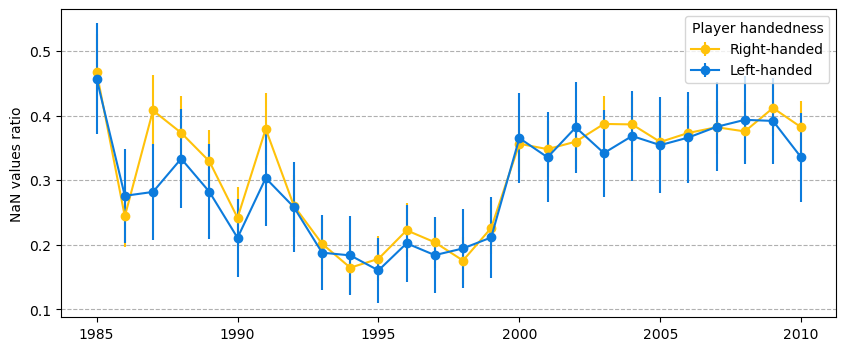

In [32]:
# find the 95% confidence interval of number of nan values using the bootstrap method
def count_na_ci(array, n_iterations=1000, ci_level=95):
    count_nan = array.isna().sum()
    count_nan_arr = []
    n = array.shape[0]
    alpha = 100 - ci_level

    for _ in range(n_iterations):
        sampled_array = array.sample(n=n, replace=True)
        count_nan_arr.append(sampled_array.isna().sum())

    lower = np.percentile(count_nan_arr, alpha / 2)
    upper = np.percentile(count_nan_arr, 100 - alpha / 2)

    return np.mean([upper - count_nan, count_nan - lower])


df_na = df.groupby(['yearID', 'throws'],
                   as_index=False)[['salary', 'playerID']].agg({
                       'salary':
                       [lambda s: count_na_ci(s), lambda s: s.isna().sum()],
                       'playerID':
                       'count'
                   })
# rename the columns
df_na.columns = ['yearID', 'throws', 'ci', 'count_na', 'count_all']

# plot the number of nan values for salary, considering the confidence interval of 95%
# Set figure size to (10,4)
plt.figure(figsize=(10, 4))

plt.errorbar(df_na[df_na['throws'] == 'R'].yearID,
             df_na[df_na['throws'] == 'R'].count_na /
             df_na[df_na['throws'] == 'R'].count_all,
             yerr=df_na[df_na['throws'] == 'R'].ci /
             df_na[df_na['throws'] == 'R'].count_all,
             fmt='-o',
             color='#FFC20A')
plt.errorbar(df_na[df_na['throws'] == 'L'].yearID,
             df_na[df_na['throws'] == 'L'].count_na /
             df_na[df_na['throws'] == 'L'].count_all,
             yerr=df_na[df_na['throws'] == 'L'].ci /
             df_na[df_na['throws'] == 'L'].count_all,
             fmt='-o',
             color='#0C7BDC')

plt.ylabel('NaN values ratio')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Player handedness', labels=['Right-handed', 'Left-handed'])

# Show the plot
plt.show()

**Second method**

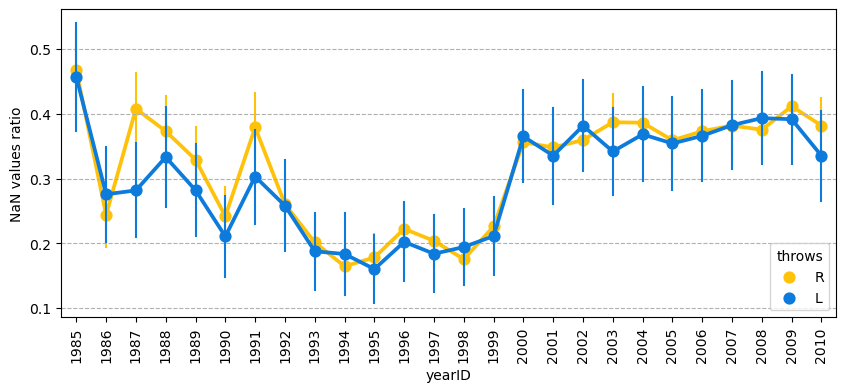

In [33]:
# create a binary column (salary_na) for salary (1 -> if salary is nan, 0 -> if salary is not nan)
df_salary = df[['playerID', 'yearID', 'throws', 'salary']].copy()
df_salary.loc[df_salary.salary.isna(), 'salary_na'] = 1
df_salary.loc[df_salary.salary.notna(), 'salary_na'] = 0

# plot the mean of the column salary_na, considering the confidence interval of 95% using the standar error of the mean
# Set figure size to (10,4)
plt.figure(figsize=(10, 4))

sns.pointplot(x=df_salary.yearID,
              y=df_salary.salary_na,
              hue=df_salary.throws,
              errwidth=1.5,
              errorbar=('se', 1.96),
              palette=['#FFC20A', '#0C7BDC'])

plt.ylabel('NaN values ratio')
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

In [34]:
df_salary_fraction_2002 = df_salary[(df_salary['throws'] == 'L') & (
    df_salary['yearID'] == 2002)]['salary_na'].mean()
print(
    'Percentage of left-handed pitchers with salary data missing for the year 2002: {d:.2f}%'
    .format(d=100 * df_salary_fraction_2002))

Percentage of left-handed pitchers with salary data missing for the year 2002: 38.17%


Because, the confidence intervals are all overlapping (except for 1987), we can say there is no significant difference between the missing nan values fraction of left and right handed pitchers over the years.

**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?

The problem that could arise is if the 5% of the non missing salaries is high-paid salary, we could over estimate the average of the salary of right handed pitchers.